In [1]:
import pandas as pd
import numpy as np
import xlrd

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict

In [3]:
from sklearn import metrics

from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import datetime
loocv = model_selection.LeaveOneOut()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, pairwise_distances, auc
from sklearn.model_selection import LeaveOneOut

from scipy.spatial import distance

from matplotlib import pyplot as plt

In [4]:
import pickle
from pathlib import Path

In [5]:
patha_to_data_folder = "..//Data//"
name = "Profiles_BRT_Deriv_Domain1.xlsx"
patha_to_data = patha_to_data_folder + name

In [6]:
xl_workbook = xlrd.open_workbook(patha_to_data)

In [7]:
sheet_names = xl_workbook.sheet_names()
print('Sheet Names', sheet_names)

xl_sheet = xl_workbook.sheet_by_name(sheet_names[0])

Sheet Names ['Profiles_BRT_Deriv_Domain1']


In [8]:
df = pd.read_excel(patha_to_data, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,600,601
0,C:\temp\karmin\20170429_KarminDB\1.Final Data ...,0.000000,0.000000,0.000000,0.022421,0.100921,0.179032,0.255326,0.327864,0.396605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C:\temp\karmin\20170429_KarminDB\1.Final Data ...,0.000000,0.000000,0.000000,0.000000,0.108712,0.277194,0.419361,0.537837,0.634155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C:\temp\karmin\20170429_KarminDB\1.Final Data ...,0.000000,0.000000,0.000000,0.051292,0.111346,0.177403,0.247527,0.317817,0.385287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C:\temp\karmin\20170429_KarminDB\1.Final Data ...,0.000000,0.000000,0.047941,0.132850,0.211599,0.289150,0.364345,0.436336,0.505142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C:\temp\karmin\20170429_KarminDB\1.Final Data ...,0.032256,0.061786,0.166271,0.295908,0.438915,0.581487,0.713320,0.828204,0.922578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(148, 602)

In [10]:
df.rename({0: "name"}, axis=1, inplace= True)

In [11]:
df.loc[df["name"].str.contains('_SCH/', regex=True), 'sickness'] = 'SCH'
df.loc[df["name"].str.contains('_Depr/', regex=True), 'sickness'] = 'Depr'
df.loc[df["name"].str.contains('_D/', regex=True), 'sickness'] = 'D'

In [12]:
df['sickness'].isna().sum()

0

In [13]:
df['label'] = df['sickness'] == "SCH"

In [14]:
df.loc[df["name"].str.contains(' TAP ', regex=True), 'moment'] = 2
df.loc[~df["name"].str.contains(' TAP ', regex=True), 'moment'] = 1

In [15]:
df_res = df[df['sickness'] != 'Depr']

In [16]:
df_res_1 = df_res[df_res['moment'] == 1].reset_index(drop = True)
print(df_res_1.shape)
df_res_2 = df_res[df_res['moment'] == 2].reset_index(drop = True)
print(df_res_2.shape)

(77, 605)
(61, 605)


In [17]:
df_res.shape

(138, 605)

In [18]:
df_res_1.loc[:,df_res_1.isna().sum() > 0.5*df_res_1.shape[0]].isna().sum().min()

53

In [19]:
df_res_1.loc[:,df_res_1.isna().sum() <= 0.5*df_res_1.shape[0]].isna().sum().max()

17

In [20]:
df_res_1 = df_res_1.loc[:,df_res_1.isna().sum() == 0]
df_res_1.shape

(77, 185)

In [21]:
lst_drop = ["name", "sickness", "moment", "label"]
lst_not_drop = df_res_1.columns.drop(lst_drop)
print(lst_not_drop)

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181],
      dtype='object', length=181)


In [22]:
df_old = df_res_1.drop(lst_drop, axis= 1)

In [23]:
label = df_res_1['label']

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

df_old = pd.DataFrame(scaler.fit_transform(df_old))

Доверительный интервал для roc-auc на старах данных и на новых
стат достоверность на старах данных и на новых - перестановоычный тест 5000 раз перемешивать
поработать с 76 факторами,а не 77

In [44]:
def clf_gs(model, clf, X, y, params, cv = None, metric = None):
    if (model == "Random Forest") | (model == "XGBClassifier"):
        clf_gs = RandomizedSearchCV(
            clf, params, scoring = metric
        )
    else:
        clf_gs = GridSearchCV(
            clf, params, scoring = metric
        )
    clf_gs.fit(X, y)
    clf_best = clf_gs.best_estimator_
    return clf_best

In [26]:
def list_average(lst):
    lst_res = []
    for x in lst:
        lst_res.append(np.mean(x))
    return lst_res

In [27]:
def bin_classify(model, clf, X, y, cv = None, params = None, metric = None, p = None, scaler = False, gs_subpath = None):

    print(model)
    if scaler == True:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X
        
    if cv == None:
        if params == None:
            clf_best = clf
        else:
            clf_best = clf_gs(model, clf, X_scaled, y, params)

        clf_best.fit(X_scaled, y)
        y_pred = clf_best.predict_proba(X_scaled)[:,1]
        return func_rocauc(y, y_pred)
    
    else:
        lst_pred = []
        for i in range(len(y)):
            if i in X.columns:
                name_i = "new_feature_"+str(i)
                try:
                    X_train = X_scaled.drop(i, axis = 0).drop(name_i, axis = 1)
                except:
                    X_train = X_scaled.drop(i, axis = 0).drop(i, axis = 1)
            else:
                X_train = X_scaled.drop(i, axis = 0)
            y_train = y.drop(i)
            if params == None:
                clf_best = clf
            else:
                clf_best = clf_gs(model, clf, X_train, y_train, params)

            clf_best.fit(X_train, y_train)
#             Запись обученной модели
            path = "Grid Search//" + model + "//" + gs_subpath
            filename = path+ "//" + str(i)+".sav"
            Path(path).mkdir(parents=True, exist_ok=True)
            pickle.dump(clf_best, open(filename, 'wb'))
# #             Загрузка обученной модели
#             clf_rfca = pickle.load(open(filename, 'rb'))

            if i in X.columns:
                try:
                    y_pred = clf_best.predict_proba(X_scaled.drop(name_i, axis = 1))[:,1]
                except:
                    y_pred = clf_best.predict_proba(X_scaled.drop(i, axis = 1))[:,1]
            else:
                y_pred = clf_best.predict_proba(X_scaled)[:,1]
            pred_i = y_pred[i]
            lst_pred.append(pred_i)
        return func_rocauc(lst_pred, y)

In [28]:
def func_rocauc(y_pred, y_label, alpha = 0.05):
    n = len(y_label)
    boot_n = 1000
    lst_rocauc = []
#     boot_ind = np.random.choice(range(n), (n, 10000), replace=True)
#     boot_pred = y_pred[boot_ind]
#     boot_label = y_label[boot_ind]
#     lst_rocauc = samples_boot.mean(axis=0)
    for i in range(boot_n):
        boot_ind = np.random.randint(n, size = n)
        boot_pred = np.array(y_pred)[boot_ind]
        boot_label = np.array(y_label)[boot_ind]
        if len(np.unique(boot_label)) > 1:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
            lst_rocauc.append(roc_auc_score(boot_label, boot_pred))
        
    # Plot ROC_AUC
    fpr, tpr, threshold = metrics.roc_curve(y_label, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
#     plt.hist(lst_rocauc, bins=50)
#     plt.title('Histogram of the bootstrapped ROC AUC scores')
#     plt.show()
    print("ROC-AUC confidence interval (alpha = ", alpha, ") : ", np.quantile(lst_rocauc, [alpha/2, 1 - (alpha)/2]))
    print("ROC-AUC: ", roc_auc_score(y_label, y_pred))
    return np.quantile(lst_rocauc, [alpha/2, 1 - (alpha)/2]), roc_auc_score(y_label, y_pred)


In [39]:
def SVM_features(X, y, cv = None, params = None, metric = None, scaler = False):
    """
    Get support vectors of dataset
    """
    print("By support vectors")
    if scaler == True:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X
    model = "SVM"
    clf = SVC()
#     params = {}
    if params == None:
        clf_best = clf
    else:
        clf_best = clf_gs(model, clf, X, y, params)
    clf_best.fit(X, y)
    clf_best.predict(X)
    return pd.DataFrame(clf_best.support_vectors_, index = clf_best.support_)

In [51]:
def make_new_features(df_orig, df_new, metric_type = None, p = None):
#     df_add = df.drop(drop_feat_list, axis=1)
    if metric_type == None:
        df_result = df_orig
    else:
        df_result = pd.DataFrame()
        if p == None:
            print(metric_type)
            for i in df_new.index.values.tolist():
                new_feature = "new_feature_" + str(i)
                df_result[new_feature] = distance.cdist(
                    df_orig,
                    [df_new.T[i]],
                    metric = metric_type
                ).flatten()
        else:
            print(metric_type, p)
            for i in df_new.index.values.tolist():
                new_feature = "new_feature_" + str(i)

                df_result[new_feature] = distance.cdist(
                    df_orig,
                    [df_new.T[i]],
                    metric = metric_type,
                    p = p
                ).flatten()

    return df_result

In [33]:
class model_class:
   'class of models'
   def __init__(self, model, clf, gs_params):
      self.model = model
      self.clf = clf
      self.gs_params = gs_params

In [34]:
lst_metric_type = ['euclidean', 'minkowski', 'cosine']
lst_p = [1, 2]
lst_SVM_ind = [True, False]

# Grid Search parametres

In [32]:
gs_params_SVC = {
    'gamma' : [0.001, 0.01, 0.1, 1, 10],
    'kernel' : ['linear', 'rbf', 'sigmoid'],
    'C' : [0.01, 0.1, 1, 10, 100]
}

In [47]:
lst_model_class = []

model = "XGBClassifier"
clf = XGBClassifier(n_estimators=100, random_state=13, n_jobs = -1)
gs_params = {
        'learning_rate' : [0.02, 0.1],
        'min_child_weight': [3, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.8],
        'max_depth' : [5, 7, 9],
        'criterion' : ['gini', 'entropy'],
        'min_samples_leaf' : [3, 5]
        }

lst_model_class.append(model_class(model, clf, gs_params))

model = "Logistic Regression"
clf = LogisticRegression(random_state = 13)
gs_params = {
    'solver' : ['liblinear'],
    'C' : [0.01, 0.1, 1, 10]
}

lst_model_class.append(model_class(model, clf, gs_params))

model = "Random Forest"
clf = RandomForestClassifier(n_estimators=100, random_state=13, n_jobs = -1)
gs_params = {
    'max_depth' : [5, 7, 9],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : [3, 5]
}

lst_model_class.append(model_class(model, clf, gs_params))


# Distance based methods

By support vectors
euclidean 1
XGBClassifier


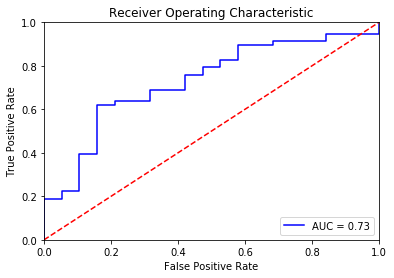

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.59891005 0.85036749]
ROC-AUC:  0.7286751361161525
-------------------------------------------------------------
Logistic Regression


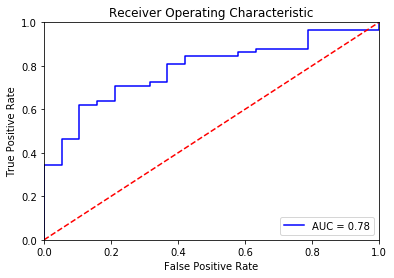

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.66196614 0.8860938 ]
ROC-AUC:  0.7849364791288567
-------------------------------------------------------------
Random Forest


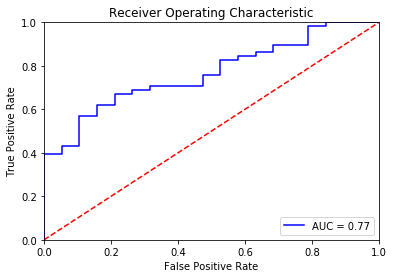

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.64554906 0.87190282]
ROC-AUC:  0.7667876588021778
-------------------------------------------------------------
minkowski 1
XGBClassifier


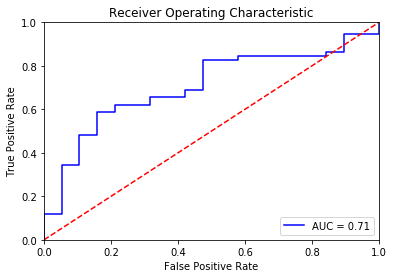

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.56586169 0.83179437]
ROC-AUC:  0.705989110707804
-------------------------------------------------------------
Logistic Regression


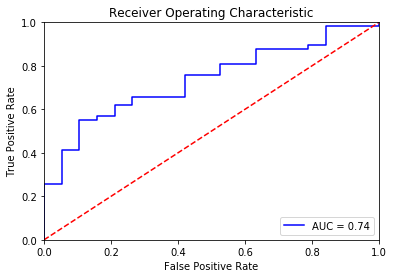

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.61075664 0.84697145]
ROC-AUC:  0.7368421052631577
-------------------------------------------------------------
Random Forest


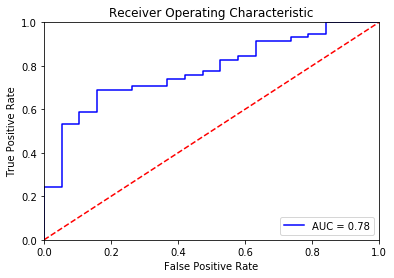

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.6585752  0.87755266]
ROC-AUC:  0.779491833030853
-------------------------------------------------------------
minkowski 2
XGBClassifier


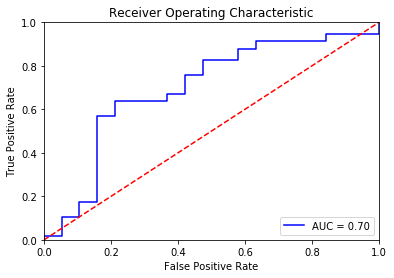

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.53857244 0.84014788]
ROC-AUC:  0.6969147005444646
-------------------------------------------------------------
Logistic Regression


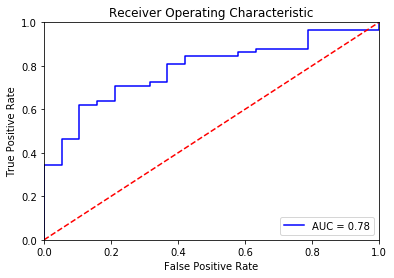

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.66928539 0.89214976]
ROC-AUC:  0.7849364791288567
-------------------------------------------------------------
Random Forest


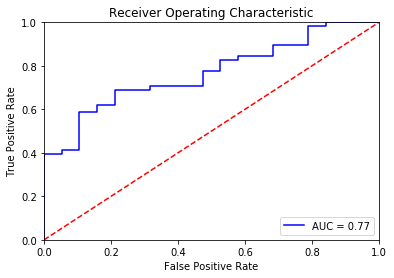

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.64246392 0.87549183]
ROC-AUC:  0.7676950998185118
-------------------------------------------------------------
cosine 1
XGBClassifier


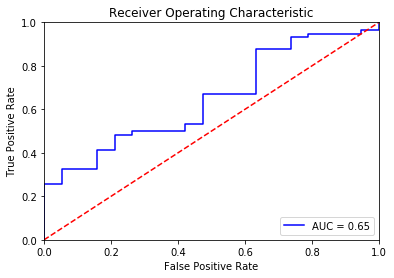

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.52259887 0.78239959]
ROC-AUC:  0.6506352087114338
-------------------------------------------------------------
Logistic Regression


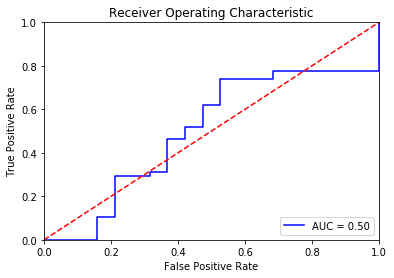

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.3412688  0.66404711]
ROC-AUC:  0.499092558983666
-------------------------------------------------------------
Random Forest


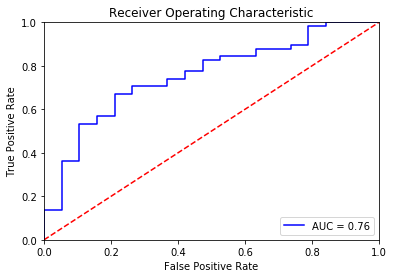

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.62523519 0.8672326 ]
ROC-AUC:  0.7558983666061706
-------------------------------------------------------------
euclidean 1
XGBClassifier


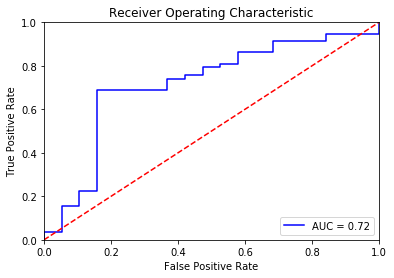

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.57348041 0.85296887]
ROC-AUC:  0.7150635208711433
-------------------------------------------------------------
Logistic Regression


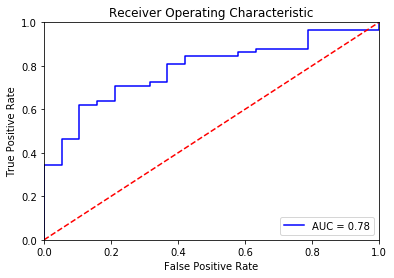

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.672717   0.89111748]
ROC-AUC:  0.7849364791288567
-------------------------------------------------------------
Random Forest


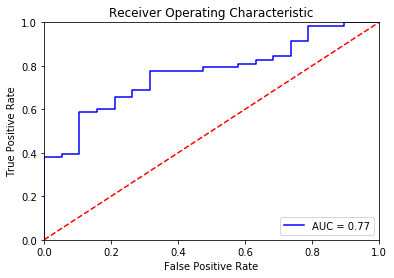

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.64901864 0.8754386 ]
ROC-AUC:  0.7676950998185118
-------------------------------------------------------------
minkowski 1
XGBClassifier


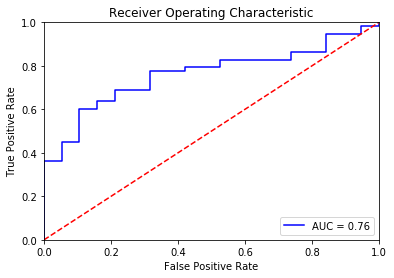

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.65242285 0.86233825]
ROC-AUC:  0.7622504537205081
-------------------------------------------------------------
Logistic Regression


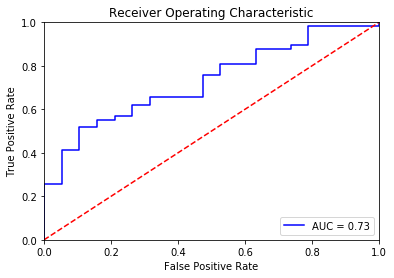

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.59674731 0.8405388 ]
ROC-AUC:  0.7295825771324864
-------------------------------------------------------------
Random Forest


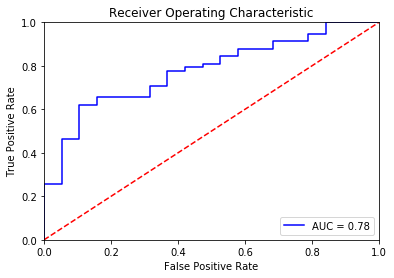

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.65158058 0.87950969]
ROC-AUC:  0.7776769509981852
-------------------------------------------------------------
minkowski 2
XGBClassifier


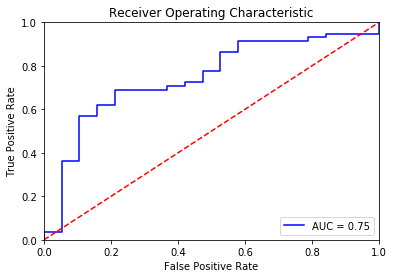

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.60577882 0.85784314]
ROC-AUC:  0.7450090744101634
-------------------------------------------------------------
Logistic Regression


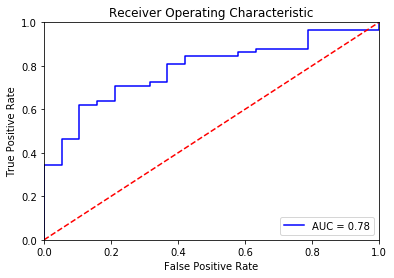

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.66889881 0.88239965]
ROC-AUC:  0.7849364791288567
-------------------------------------------------------------
Random Forest


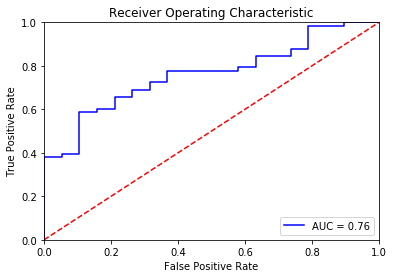

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.64397555 0.86621507]
ROC-AUC:  0.7613430127041741
-------------------------------------------------------------
cosine 1
XGBClassifier


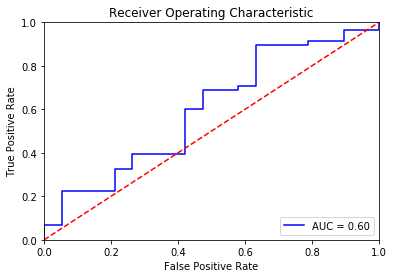

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.44734124 0.75440715]
ROC-AUC:  0.5998185117967332
-------------------------------------------------------------
Logistic Regression


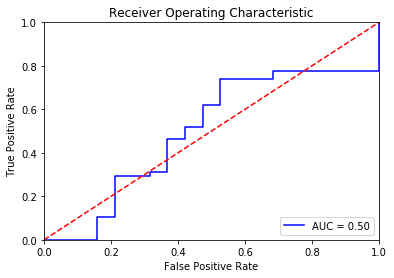

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.354804   0.65733171]
ROC-AUC:  0.499092558983666
-------------------------------------------------------------
Random Forest


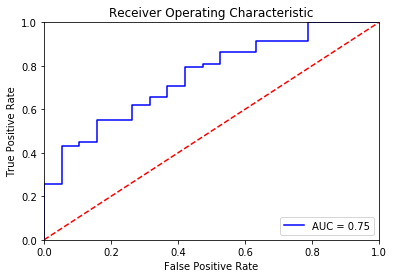

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.62690789 0.86069848]
ROC-AUC:  0.7522686025408348
-------------------------------------------------------------


In [48]:
for SVM_ind in lst_SVM_ind:
    if SVM_ind == True:
        df_new = SVM_features(
            df_old, label, params = gs_params_SVC
        )
    else:
        df_new = df_old
    for metric_type in lst_metric_type:
        for p in lst_p:
            if (p == 1) | ((p == 2) & (metric_type == 'minkowski')):
                df_new_feat = make_new_features(
                    df_old, df_new, metric_type, p
                )
                for i in range(len(lst_model_class)):
                    bin_classify(
                        lst_model_class[i].model,
                        lst_model_class[i].clf,
                        df_new_feat,
                        label,
                        cv = loocv,
                        params = lst_model_class[i].gs_params,
                        gs_subpath = str(SVM_ind) + "_" + metric_type + "_" + str(p)
                    )
                    print("-------------------------------------------------------------")

# Original

XGBClassifier


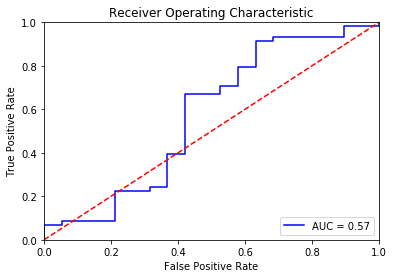

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.40467726 0.73685326]
ROC-AUC:  0.5716878402903811
-------------------------------------------------------------
Logistic Regression


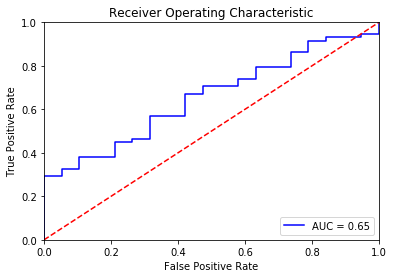

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.52047386 0.77843137]
ROC-AUC:  0.6542649727767695
-------------------------------------------------------------
Random Forest


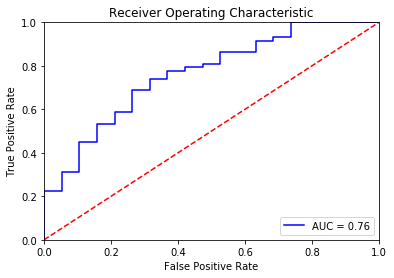

ROC-AUC confidence interval (alpha =  0.05 ) :  [0.62254652 0.87098842]
ROC-AUC:  0.7622504537205081
-------------------------------------------------------------


In [53]:
df_new_feat = df_old
metric_type = None
for i in range(len(lst_model_class)):
    bin_classify(
        lst_model_class[i].model,
        lst_model_class[i].clf,
        df_new_feat,
        label,
        cv = loocv,
        params = lst_model_class[i].gs_params,
        gs_subpath = str(metric_type)
    )
    print("-------------------------------------------------------------")